Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [5]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.000,304177.000,1659028.000,715680.000,2653798.000,1481703.000,...,57948.000,58025.000,41167.000,471564.000,196386.000,676174.000,208.328,252.188,207.964,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.000,106780.000,720711.000,222100.000,972488.000,498362.000,...,9748.000,8789.000,6714.000,79117.000,30847.000,112335.000,nan,nan,nan,258.860
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.000,297888.000,1369815.000,1590376.000,3401580.000,1435908.000,...,55433.000,49081.000,37410.000,437127.000,175210.000,614881.000,215.254,265.366,206.213,262.170
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.000,178571.000,958785.000,574603.000,1743022.000,964323.000,...,34632.000,36011.000,27651.000,281338.000,123113.000,405259.000,210.206,256.312,208.634,264.620
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.000,2072470.000,16546514.000,7641041.000,27138832.000,14358922.000,...,418418.000,363296.000,270675.000,3286034.000,1372011.000,4717112.000,208.399,260.892,196.764,nan


In [6]:
#Eksik değerleri kontrol edelim.

df.isnull().head()
df.isnull().sum()*100/df.shape[0]

PRIMARY_KEY                     0.000
STATE                           0.000
YEAR                            0.000
ENROLL                         17.627
TOTAL_REVENUE                  14.209
FEDERAL_REVENUE                14.209
STATE_REVENUE                  14.209
LOCAL_REVENUE                  14.209
TOTAL_EXPENDITURE              14.209
INSTRUCTION_EXPENDITURE        14.209
SUPPORT_SERVICES_EXPENDITURE   14.209
OTHER_EXPENDITURE              17.627
CAPITAL_OUTLAY_EXPENDITURE     14.209
GRADES_PK_G                    11.595
GRADES_KG_G                     8.847
GRADES_4_G                      8.780
GRADES_8_G                      8.780
GRADES_12_G                     8.780
GRADES_1_8_G                    8.780
GRADES_9_12_G                   8.780
GRADES_ALL_G                   11.595
AVG_MATH_4_SCORE               64.075
AVG_MATH_8_SCORE               64.343
AVG_READING_4_SCORE            64.276
AVG_READING_8_SCORE            66.622
dtype: float64

In [7]:
#Eksik değerleri enterpolasyonla dolduralım

df2 = df.interpolate()

In [8]:
df2.isnull().sum()*100/df2.shape[0]

PRIMARY_KEY                    0.000
STATE                          0.000
YEAR                           0.000
ENROLL                         3.418
TOTAL_REVENUE                  0.000
FEDERAL_REVENUE                0.000
STATE_REVENUE                  0.000
LOCAL_REVENUE                  0.000
TOTAL_EXPENDITURE              0.000
INSTRUCTION_EXPENDITURE        0.000
SUPPORT_SERVICES_EXPENDITURE   0.000
OTHER_EXPENDITURE              3.418
CAPITAL_OUTLAY_EXPENDITURE     0.000
GRADES_PK_G                    0.000
GRADES_KG_G                    0.000
GRADES_4_G                     0.000
GRADES_8_G                     0.000
GRADES_12_G                    0.000
GRADES_1_8_G                   0.000
GRADES_9_12_G                  0.000
GRADES_ALL_G                   0.000
AVG_MATH_4_SCORE               0.000
AVG_MATH_8_SCORE               0.000
AVG_READING_4_SCORE            0.000
AVG_READING_8_SCORE            0.067
dtype: float64

Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [9]:
df2['weighted_average'] = (df2['AVG_MATH_4_SCORE'].mean()*df2['GRADES_4_G'] + df2['AVG_MATH_8_SCORE'].mean()*
df2['GRADES_8_G'])/(df2['GRADES_8_G'] + df2['GRADES_4_G'])
df2['weighted_average']

0      253.306
1      252.181
2      251.987
3      253.711
4      251.778
5      252.030
6      251.985
7      252.949
8      251.643
9      251.750
10     252.479
11     251.605
12     253.448
13     253.388
14     253.538
15     253.061
16     252.448
17     253.362
18     252.341
19     252.524
20     251.874
21     252.262
22     252.861
23     252.801
24     252.822
25     252.876
26     252.677
27     252.920
28     251.910
29     251.765
         ...  
1462   252.281
1463   252.281
1464   252.281
1465   252.281
1466   252.281
1467   252.281
1468   252.281
1469   252.281
1470   252.281
1471   252.281
1472   252.281
1473   252.281
1474   252.281
1475   252.281
1476   252.281
1477   252.281
1478   252.281
1479   252.281
1480   252.281
1481   252.281
1482   252.281
1483   252.281
1484   252.281
1485   252.281
1486   252.281
1487   252.281
1488   252.281
1489   252.281
1490   252.281
1491   252.281
Name: weighted_average, Length: 1492, dtype: float64

Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [25]:
df_korelasyon = df2[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE","weighted_average"]
           ].corr()

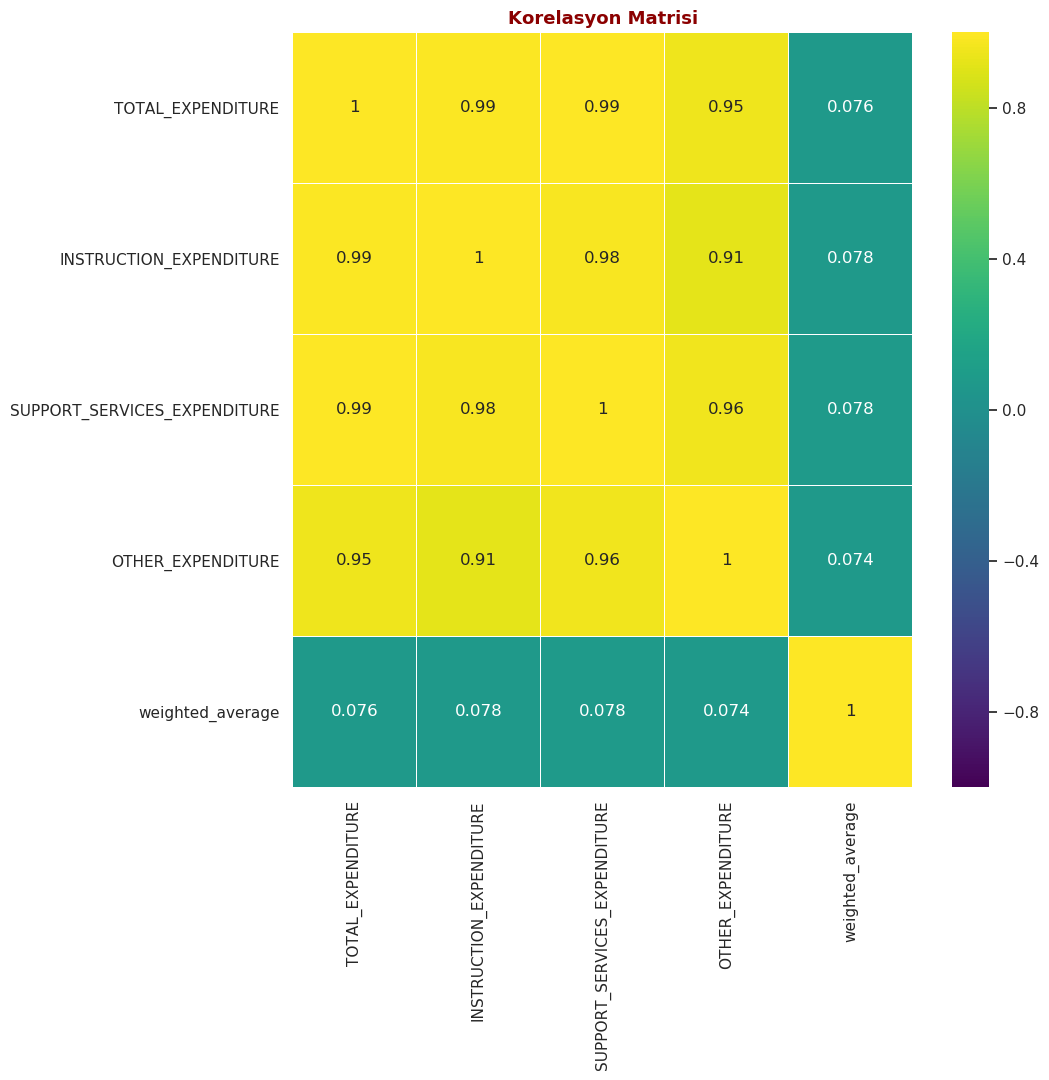

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_korelasyon, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title('Korelasyon Matrisi', fontdict=baslik_font)
plt.show()

Genel olarak kolerasyon oldukça düşüktür.

In [32]:
#Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! 
#Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [34]:
df2=df2.dropna()
X = StandardScaler().fit_transform(df2)

Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[ 1.00069444e+00  9.92400341e-01  9.94268645e-01  9.49358450e-01
   9.30667624e-01  6.91293970e-01  8.45481610e-01  8.47887405e-01
   8.58143250e-01  8.83492910e-01  8.49576716e-01  8.73452953e-01
   8.40866164e-01  1.27549294e-01  1.17492336e-01  6.77875939e-02
   1.07351299e-01  7.31332149e-02]
 [ 9.92400341e-01  1.00069444e+00  9.78608741e-01  9.14983491e-01
   8.95022895e-01  6.53111631e-01  8.13048466e-01  8.15665573e-01
   8.25675977e-01  8.49666411e-01  8.17463817e-01  8.41153239e-01
   8.08663846e-01  1.24568754e-01  1.16711408e-01  7.63179265e-02
   1.11613554e-01  7.54092729e-02]
 [ 9.94268645e-01  9.78608741e-01  1.00069444e+00  9.56331500e-01
   9.15637939e-01  6.90249583e-01  8.48325640e-01  8.49731676e-01
   8.60219726e-01  8.89380639e-01  8.51346213e-01  8.76258102e-01
   8.40662070e-01  1.39345418e-01  1.29165125e-01  7.65238865e-02
   1.14769092e-01  7.54617435e-02]
 [ 9.49358450e-01  9.14983491e-01  9.56331500e-01  1.00069444e+00
   9.17388110e-0

In [35]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Özvektör {}: \n{}'.format(i + 1, eigvec_cov))
    print('Özdeğer  {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'Verikümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    eig_val_cov / sum(eig_val_cov)
)

Özvektör 1: 
[-0.27391577 -0.26559032 -0.27383893 -0.27855451 -0.27098205 -0.23603243
 -0.28468323 -0.28522837 -0.28652036 -0.28654886 -0.28555289 -0.28769456
 -0.28284971 -0.00175464 -0.00674242  0.01072088 -0.02552523 -0.03126445]
Özdeğer  1: 11.71299557765008
----------------------------------------
Özvektör 2: 
[ 0.08422211  0.0877266   0.09012128  0.05285389  0.04914148  0.00328865
 -0.0606713  -0.06462147 -0.05808652 -0.02483631 -0.06325855 -0.04418713
 -0.04997147  0.5597169   0.55828243  0.53121164  0.21075054  0.0025705 ]
Özdeğer  2: 2.8816959961127386
----------------------------------------
Özvektör 3: 
[-0.05886613 -0.05509313 -0.05254872 -0.04351901 -0.10594054  0.01573933
  0.01114904  0.00780294  0.02660299  0.04125895  0.01313517  0.03139209
  0.01504466 -0.03567676 -0.02084995 -0.11038699  0.55456113  0.80744207]
Özdeğer  3: 1.0907055959034042
----------------------------------------
Özvektör 4: 
[ 0.01778033  0.0197303   0.01809157  0.01444283  0.01721652  0.07514819


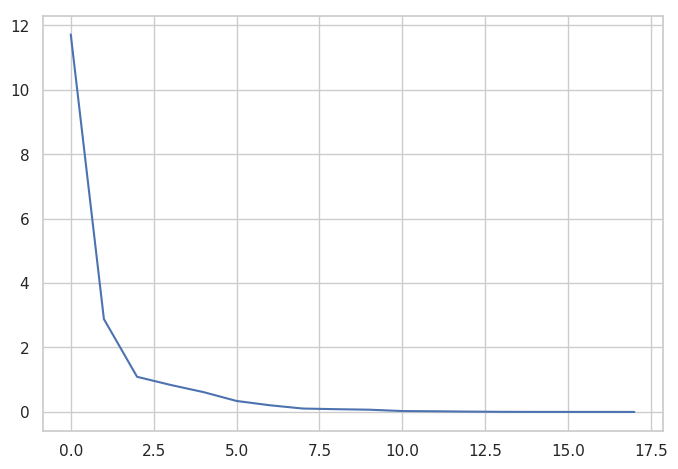

[1.17129956e+01 2.88169600e+00 1.09070560e+00 8.40047404e-01
 6.15899547e-01 3.40707518e-01 2.07588174e-01 1.04997449e-01
 8.54109512e-02 6.95370357e-02 2.75510040e-02 2.01011553e-02
 1.00169206e-02 3.35600390e-03 1.04798395e-03 4.34476047e-04
 3.28462929e-04 7.87446059e-05]


In [37]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Veri kümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.6502704  0.15998312 0.0605527  0.04663691 0.0341929 ]


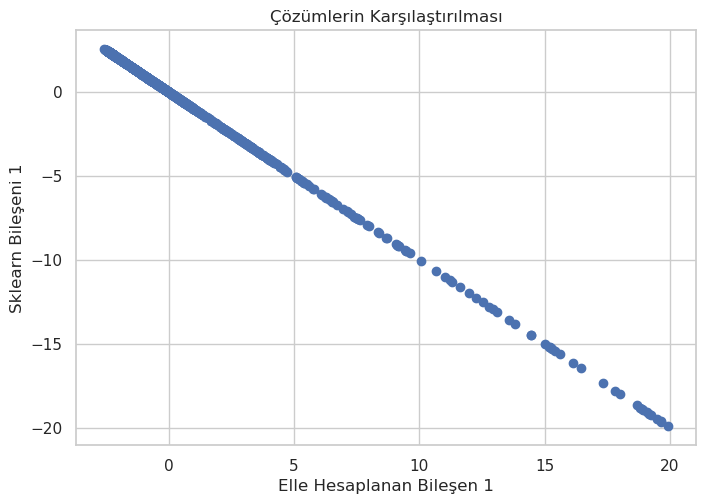

In [38]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()

In [39]:
# %65 ilk değişken tarafından açıklanmaktadır.

Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [40]:
df3 = df2[['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE' ]]
scaled_data = preprocessing.scale(df3)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data.T[0]

df2['PCA1'] = pca_data.T[0]
df2.corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,weighted_average,PCA1
TOTAL_EXPENDITURE,1.000,0.992,0.994,0.949,0.930,0.691,0.845,0.847,0.858,0.883,0.849,0.873,0.840,0.127,0.117,0.068,0.107,0.073,0.995
INSTRUCTION_EXPENDITURE,0.992,1.000,0.978,0.914,0.894,0.653,0.812,0.815,0.825,0.849,0.817,0.841,0.808,0.124,0.117,0.076,0.112,0.075,0.981
SUPPORT_SERVICES_EXPENDITURE,0.994,0.978,1.000,0.956,0.915,0.690,0.848,0.849,0.860,0.889,0.851,0.876,0.840,0.139,0.129,0.076,0.115,0.075,0.995
OTHER_EXPENDITURE,0.949,0.914,0.956,1.000,0.917,0.717,0.895,0.892,0.899,0.917,0.893,0.909,0.879,0.090,0.085,0.027,0.098,0.074,0.973
CAPITAL_OUTLAY_EXPENDITURE,0.930,0.894,0.915,0.917,1.000,0.744,0.850,0.857,0.866,0.872,0.859,0.874,0.861,0.100,0.076,0.014,0.054,0.026,0.924
GRADES_PK_G,0.691,0.653,0.690,0.717,0.744,1.000,0.788,0.790,0.788,0.755,0.792,0.776,0.804,0.031,0.032,-0.029,0.107,0.062,0.698
GRADES_KG_G,0.845,0.812,0.848,0.895,0.850,0.788,1.000,0.998,0.995,0.980,0.998,0.992,0.978,-0.090,-0.051,-0.103,0.053,0.097,0.866
GRADES_4_G,0.847,0.815,0.849,0.892,0.857,0.790,0.998,1.000,0.998,0.980,1.000,0.994,0.983,-0.097,-0.056,-0.108,0.043,0.099,0.867
GRADES_8_G,0.858,0.825,0.860,0.899,0.866,0.788,0.995,0.998,1.000,0.986,0.999,0.998,0.984,-0.085,-0.048,-0.102,0.050,0.124,0.876
GRADES_12_G,0.883,0.849,0.889,0.917,0.872,0.755,0.980,0.980,0.986,1.000,0.981,0.994,0.965,-0.030,0.000,-0.067,0.079,0.141,0.900
